In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# LSTM

In [3]:
sjlstm = [ 29,  29,  30,  20,  11,   9,  12,  20,  20,  25,  35,  47,  48,
        64, 137, 222,  84,  37,  12,  54, 145,  33,  55,  37,  46,  31,
        69,  92,  54,  39,  37,  54,  38,  31,  35,  38,  23,  19,  11,
        29,  41,  34,  28,  20,  27,  15,   0,  19,  15,  17,  10,   0,
         0,   0,   0,   0,   0,   5,  17,  19,  27,  27,  33,  38,  43,
        45,  47,  48,  27,  35,  64,  81,  65,  61,  42,  54,  56,  83,
        65,  43,  54,  40,  57,  37,  32,  30,  37,  41,  20,  34,  19,
        13,  48,  25,  30,  22,  41,  42,  26,  48,  17,   0,   8,   7,
        12,  17,   0,  29,  30,  21,  28,   9,  17,  39,  69, 147,  35,
        49,  39,  48,  27,  62,  67,  32,  56,  41,  61,  50,  37,   5,
        32,  52,  46,  48,  28,  50,  27,  40,  25,  25,  34,  26,  29,
        18,  17,  14,  16,  22,  24,  26,  11,  11,  11,  16,   5,   4,
        32,   0,  25,  33,  12,  16,   0,   7,  31,  13,  24,  41,  44,
        42,  53,  64,  98,  55,  55,  24,  42,  28,  49,  42,  39,  26,
        30,  37,  19,  39,  41,  29,  28,  66,  39,  43,  26,  22,  17,
        19,  16,  20,  17,  17,  17,  57,  60,  60,   0,   0,   0,  24,
         1,  11,   6,  12,  17,  13,  16,  13,  12,  15,  27,  30,  51,
        51,  44,  36,  16,  25,  46,  30,  64,  29,  35,  35,  38,  48,
        61,  81,  80,  44,  27,  62,  41,  41,  40,  36,  26,  23,  19,
        21,  24,  26,  30,  23,  21,  28,  13,  21,  10,   0,   0,   1]
iqlstm = [ 5,  3,  4,  3,  3,  1,  1,  3,  1,  3,  2,  2,  2,  2,  3,  4,  5,
        6,  8,  8, 10,  9,  8,  8,  7,  7,  6,  4,  5,  5,  9, 10,  9, 10,
        9,  9,  7,  8,  9, 11, 11, 10,  8,  7,  6,  6,  8,  5,  7,  4,  4,
        5,  7,  8,  3,  3,  3,  5,  2,  1,  2,  3,  3,  5,  7,  8,  7,  7,
        9,  7,  6,  8,  9,  8, 10, 10, 10, 10, 10, 10,  9,  7,  9,  9, 11,
       11, 11,  9, 10,  9,  9,  7,  6,  5,  5,  8,  6,  6,  4,  6,  4,  2,
        2,  4,  4,  4,  4,  3,  3,  1,  1,  1,  2,  2,  1,  2,  3,  4,  5,
        8,  8,  8,  9, 10,  8, 10, 10,  9,  9,  8, 10,  8, 10, 12, 11,  9,
        9,  6,  9, 10, 11, 11,  8,  7,  2,  6,  6,  6,  4,  7,  7,  6,  6,
        5,  6,  7]

## 4: Benchmark 25.8

In [4]:
sj4 = [27, 25, 33, 27, 29, 30, 32, 40, 42, 39, 34, 37, 44, 41, 51, 52, 53,
       58, 71, 63, 50, 44, 56, 40, 39, 35, 32, 40, 36, 33, 27, 20, 20, 24,
       22, 22, 21, 22, 23, 25, 21, 20, 19, 20, 21, 22, 19, 20, 20, 21, 22,
       24, 24, 22, 26, 25, 40, 35, 34, 37, 38, 44, 46, 47, 51, 53, 45, 45,
       47, 54, 52, 53, 49, 45, 54, 55, 59, 54, 43, 36, 38, 42, 42, 30, 31,
       30, 28, 28, 27, 25, 24, 25, 21, 23, 26, 27, 38, 30, 29, 38, 30, 27,
       24, 30, 46, 45, 33, 38, 44, 64, 59, 50, 48, 52, 61, 69, 55, 52, 56,
       65, 56, 64, 65, 65, 61, 55, 49, 54, 62, 46, 37, 41, 44, 29, 23, 23,
       23, 26, 23, 18, 18, 22, 21, 21, 18, 20, 20, 19, 17, 19, 19, 18, 22,
       27, 20, 20, 21, 24, 20, 31, 35, 40, 40, 60, 55, 50, 45, 46, 40, 50,
       43, 58, 52, 54, 50, 44, 51, 41, 46, 53, 40, 39, 31, 43, 36, 35, 31,
       29, 24, 26, 19, 20, 22, 20, 18, 18, 17, 18, 19, 18, 20, 20, 18, 19,
       20, 23, 24, 23, 25, 30, 26, 37, 33, 27, 41, 39, 42, 46, 42, 42, 44,
       45, 41, 45, 53, 46, 42, 37, 40, 41, 49, 47, 39, 57, 48, 55, 39, 39,
       39, 31, 28, 25, 23, 26, 20, 19, 18, 20, 20, 19, 19, 19, 23, 19, 21,
       27, 23, 27, 25, 23]
iq4 = [ 7,  5,  8,  2,  2,  5,  3,  5,  4,  6,  6,  5,  5,  5,  5,  5,  6,
        9, 12,  7,  8,  9,  9, 11,  9,  5,  8,  6,  8,  7,  6,  6,  8,  8,
        9,  8,  8,  8,  8, 10,  8,  8,  8, 10, 10,  5,  8,  9,  7,  6,  8,
        5,  7,  7,  3,  4,  5,  4,  4,  4,  2,  3,  5,  6,  6,  9,  6,  8,
       13,  8,  7,  8,  9,  8, 10, 10,  9, 10, 11,  9,  9,  7,  7,  9, 10,
        8,  7,  6,  8,  7,  6,  8,  7, 12, 11,  9,  8,  4,  9,  6,  6,  6,
        3,  5,  4,  4,  4,  5,  2,  4,  3,  3,  4,  5,  4,  5,  4,  5,  4,
       10,  6, 11,  9,  9, 13, 14, 15, 10, 10, 12, 11,  6,  8, 11, 10, 12,
       10, 10,  9, 10, 11, 15, 11,  9,  8, 12,  8,  3, 11,  8,  7,  7,  7,
        6,  5,  6]

## 3: RF with 3 Week Lag 24.9

In [5]:
sj3 = [ 12,  12,  12,  10,  14,  11,  10,  13,  28,  18,  35,  25,  30,
        39,  37,  81,  87,  81,  99,  55,  42,  41,  44,  45,  42,  40,
        42,  36,  38,  39,  27,  25,  28,  31,  26,  30,  34,  33,  41,
        38,  22,  21,  19,  17,  19,  12,   9,   9,  10,  10,  12,  14,
        15,  13,  13,  12,  15,  10,  12,  15,  52,  40,  33,  23,  33,
        34,  42,  79,  73,  64,  79,  43,  46,  52,  41,  55,  57,  51,
        53,  59,  40,  40,  44,  38,  36,  48,  46,  70,  48,  58,  48,
        35,  23,  30,  47,  47,  62,  44,  21,  21,  19,  15,  11,  14,
        11,  15,  28,  47,  39,  46,  45,  75,  68,  98, 118,  87,  86,
        77,  92, 115, 112, 122, 101,  84,  55,  52,  48,  57,  73,  60,
        61,  56,  54,  40,  27,  32,  30,  46,  37,  39,  36,  38,  35,
        22,  28,  25,  28,  19,  17,  25,  15,  14,  18,  17,  11,  13,
        17,  25,  19,  29,  41,  59,  49,  52,  49,  38,  53,  45,  76,
        78,  85, 103,  59,  54,  33,  36,  34,  34,  35,  50,  34,  44,
        45,  48,  51,  43,  43,  49,  40,  36,  21,  24,  25,  27,  27,
        25,  26,  22,  26,  26,  23,  30,  15,  16,  19,  20,  17,  19,
        13,   9,  12,  16,  13,  29,  60,  52,  56,  73,  30,  29,  29,
        30,  32,  36,  32,  40,  45,  47,  57,  53,  41,  34,  44,  53,
        47,  59,  47,  44,  46,  33,  41,  29,  31,  38,  21,  23,  21,
        22,  18,  16,  16,  14,  24,  12,  16,  15,  21,  21,  20,  17]
iq3 = [ 5,  6,  4,  2,  2,  2,  2,  4,  4,  5,  3,  4,  3,  5,  6, 10, 10,
       10, 10, 11, 14,  8,  9,  9,  8,  6,  7,  7,  5,  5,  5,  8, 13, 12,
        9, 10, 11, 12, 11, 12,  8, 11,  8,  8,  5,  5,  5,  4,  3,  3,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  4,  3,  4,  5,  5,  6,  8,  8,
        9,  9, 11, 12, 10, 11, 11, 10, 13, 12,  9,  7,  7,  8,  9,  8,  8,
        7,  7,  5,  7,  6,  9, 11, 10,  9,  7,  7,  6,  5,  4,  3,  4,  3,
        2,  3,  3,  3,  3,  3,  2,  3,  2,  2,  2,  2,  2,  2,  3,  5,  7,
        7, 10, 10, 13, 14, 11, 12, 11, 12,  8,  7,  9,  8, 13,  9, 12,  8,
       13, 13, 16, 16, 13, 12,  8, 11,  7,  8,  9,  8,  7,  6,  4,  4,  3,
        3,  3,  4]


## 2. RFR with degraded features and a 3 week lag

In [6]:
sj2 = [ 10,  11,  11,   8,   8,  11,   9,   8,  32,  25,  25,  29,  34,
        35,  30,  84, 131, 126, 123,  58,  45,  46,  58,  37,  63,  49,
        61,  38,  38,  28,  23,  23,  31,  24,  22,  22,  26,  28,  29,
        26,  20,  16,  17,  14,  21,  11,   7,   8,  10,  10,   9,  10,
         9,   9,   7,   9,  11,   9,  11,  11,  56,  34,  21,  24,  30,
        32,  35,  77,  90, 101,  74,  44,  49,  57,  48,  59,  56,  56,
        63,  84,  43,  60,  48,  41,  43,  45,  45,  49,  40,  41,  40,
        34,  20,  43,  54,  69,  73,  55,  16,  15,  11,  10,   9,   9,
         9,  10,  19,  18,  24,  33,  29,  25,  34, 131, 130, 112,  96,
       102, 114, 160, 167, 181, 165, 119,  91,  58,  80,  75,  98,  74,
        63,  57,  42,  33,  35,  33,  33,  61,  48,  41,  35,  35,  34,
        20,  25,  31,  35,  30,  18,  24,  14,   9,  11,  14,   7,  10,
        11,  17,  14,  17,  16,  16,  21,  29,  32,  35,  47,  31,  83,
       104, 116, 129,  72, 106,  44,  28,  38,  43,  52,  71,  55,  56,
        75,  47,  58,  42,  50,  41,  39,  35,  21,  20,  27,  27,  23,
        22,  24,  23,  21,  24,  17,  27,   8,   9,  13,  17,  10,  13,
         8,   7,   8,  11,  10,  16,  18,  20,  17,  67,  33,  31,  37,
        30,  33,  36,  34,  45,  60,  68,  68,  60,  59,  38,  38,  65,
        47,  57,  52,  60,  40,  33,  46,  27,  33,  34,  15,  25,  21,
        13,  13,  11,  16,  23,  33,  11,  12,   9,  13,  14,  12,  13]
iq2 = [ 4,  3,  3,  2,  2,  2,  2,  3,  2,  3,  3,  3,  3,  3,  6,  8,  8,
        8, 11,  9, 10, 10,  8,  7,  6,  7,  6,  7,  5,  3,  6,  6,  9, 10,
        9, 10, 11,  9, 10,  9,  8,  9,  8,  6,  5,  5,  5,  3,  4,  2,  2,
        2,  2,  1,  2,  2,  2,  3,  2,  2,  2,  3,  4,  4,  5,  6,  7,  6,
        6, 10,  7, 10,  8,  8,  9, 11, 11,  9,  7,  6,  6,  6,  7,  8,  7,
        6,  5,  4,  6,  6,  7,  9,  9,  8,  7,  5,  5,  3,  3,  3,  3,  3,
        2,  2,  2,  3,  3,  2,  2,  2,  2,  2,  1,  1,  2,  2,  3,  4,  6,
        7,  7, 10, 12, 11,  8,  8,  9,  9,  7,  7,  9,  6, 10, 11,  9,  8,
        9, 11, 12, 11,  9,  8,  7, 10,  5,  5,  7,  7,  6,  5,  4,  4,  3,
        2,  2,  2]

## 1. RFR with degraded features, fixed seasons, and a 3 week lag

In [7]:
sj1 = [  9,  10,  11,  11,   9,  10,   8,  11,  11,  10,  11,  18,  36,
        38,  31,  62,  93,  76,  85,  54,  39,  38,  58,  48,  55,  44,
        43,  45,  37,  26,  24,  20,  24,  30,  23,  20,  26,  29,  33,
        29,  19,  16,  17,  15,  15,  11,   8,  10,   7,  10,  11,  10,
        11,   8,   8,   9,  12,   8,  10,  11,  15,  18,  22,  23,  33,
        33,  35,  71,  66,  54,  51,  47,  54,  47,  39,  50,  62,  70,
        68,  50,  52,  45,  48,  33,  41,  43,  42,  57,  39,  38,  35,
        26,  18,  30,  44,  63,  55,  33,  17,  17,  13,   9,   9,  13,
        15,  10,  20,  29,  27,  34,  33,  36,  50,  48,  44,  35,  33,
        95,  72, 120, 115, 132, 105,  88,  64,  46,  60,  68,  68,  52,
        49,  45,  46,  31,  32,  28,  27,  39,  33,  33,  26,  33,  25,
        19,  22,  24,  28,  22,  17,  19,  13,  12,  20,  18,  10,  11,
        12,  16,  13,  20,  26,  29,  29,  36,  27,  19,  29,  27,  31,
        73,  72,  92,  61,  71,  42,  33,  37,  31,  36,  50,  59,  50,
        41,  47,  49,  39,  46,  46,  29,  30,  19,  18,  26,  25,  19,
        22,  22,  20,  22,  23,  17,  25,  15,  12,  15,  18,  15,  15,
        13,   7,  12,  18,  13,  15,  35,  38,  28,  23,  18,  21,  24,
        29,  33,  36,  36,  37,  46,  65,  67,  48,  62,  44,  48,  40,
        56,  48,  50,  47,  43,  34,  35,  33,  33,  29,  20,  17,  20,
        19,  14,  11,  13,  18,  19,  11,  12,  13,  16,  20,  14,  13]
iq1 = [ 4,  3,  3,  2,  3,  2,  2,  3,  3,  3,  4,  2,  3,  4,  5, 10,  9,
        9,  8,  9, 11, 10,  8,  8,  7,  7,  6,  6,  6,  5,  5,  8, 10, 11,
       10, 10, 10, 11, 10,  8,  7, 10,  8,  6,  6,  5,  4,  4,  3,  2,  2,
        2,  2,  2,  2,  1,  2,  2,  2,  2,  3,  3,  4,  4,  4,  6,  7,  7,
        8,  8,  8,  9,  8,  8,  9,  9, 12,  9,  8,  8,  7,  8, 10,  7,  8,
        7,  6,  5,  7,  6,  8,  8,  7,  8,  7,  6,  5,  3,  4,  3,  3,  3,
        2,  2,  2,  3,  3,  3,  2,  3,  2,  2,  2,  2,  2,  2,  4,  4,  7,
        7,  6,  9, 12, 11, 12, 10, 10, 11,  8,  7,  9,  9, 11,  9, 10,  9,
       10, 13, 12, 11, 11,  8,  7,  9,  6,  6,  7,  8,  7,  5,  4,  3,  3,
        2,  3,  3]

## 1. RFR with degraded features, fixed seasons, and a 3 week lag, but then the solution was dropped to a gradient, *10%, then reintegrated.

In [8]:
sj5 =[9, 10, 11, 11, 9, 10, 8, 11, 11, 10, 11, 18, 36, 42, 50, 84, 115, 117,
      105, 78, 53, 54, 66, 69, 66, 60, 55, 53, 43, 30, 24, 20, 24, 30, 24, 21,
      26, 32, 35, 29, 19, 16, 17, 15, 15, 11, 8, 10, 7, 10, 11, 10, 11, 8, 8, 
      9, 12, 8, 10, 11, 15, 18, 22, 26, 34, 39, 55, 82, 88, 75, 66, 65, 66, 60,
      55, 66, 83, 93, 88, 73, 65, 61, 55, 47, 48, 53, 59, 63, 54, 45, 39, 27, 
      22, 34, 58, 75, 68, 40, 19, 17, 13, 9, 9, 13, 15, 10, 20, 29, 32, 36, 40,
      47, 59, 61, 54, 44, 64, 103, 129, 156, 178, 179, 157, 123, 90, 72, 79, 91,
      88, 74, 63, 59, 52, 41, 34, 31, 34, 40, 40, 35, 32, 33, 26, 19, 22, 24, 28,
      22, 17, 19, 13, 12, 20, 18, 10, 11, 12, 16, 13, 20, 26, 30, 34, 36, 29, 23,
      29, 31, 50, 85, 109, 112, 99, 83, 60, 43, 40, 39, 46, 63, 72, 65, 57, 59, 59,
      54, 56, 52, 39, 30, 20, 18, 26, 25, 19, 22, 22, 20, 22, 23, 18, 25, 15, 12, 
      15, 18, 15, 15, 13, 7, 12, 18, 13, 16, 35, 41, 32, 23, 18, 21, 24, 31, 38, 
      42, 43, 48, 63, 82, 84, 75, 72, 64, 57, 59, 65, 66, 63, 60, 52, 44, 40, 39,
      36, 30, 20, 17, 20, 19, 14, 11, 13, 18, 19, 11, 12, 13, 16, 20, 14, 13]

# SJ Comparison

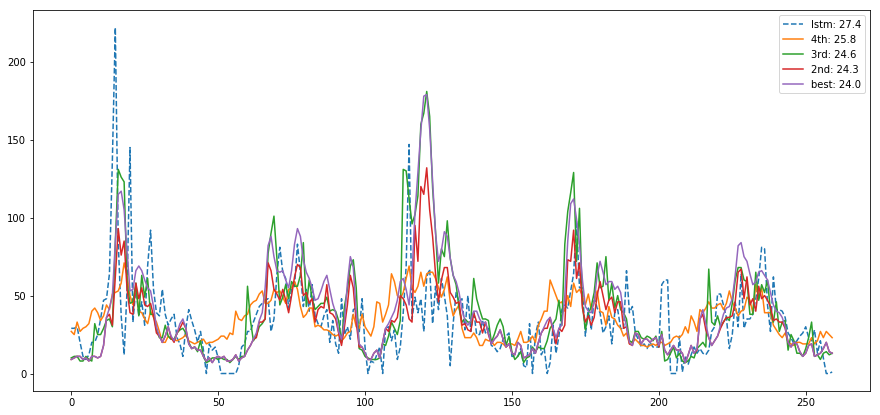

In [8]:
plt.figure(figsize=[15,7])
plt.plot(sjlstm, linestyle='--', label='lstm: 27.4')
plt.plot(sj4, label='4th: 25.8')
#plt.plot(sj3, label='3rd: 24.9')
plt.plot(sj2, label='3rd: 24.6')
plt.plot(sj1, label='2nd: 24.3')
plt.plot(sj5, label='best: 24.0')

plt.legend()
plt.show()

- #4: The Benchmark: a Negative Binomial Regression Model trained on both cities at once and just a few features.
- #3: Random Forest Regressor with features lagged at 1/2/3 weeks
- #2: Random Forest Regressor with features lagged at 1/2/3 weeks and degraded features to match test data
- #1: Random Forest Regressor with features lagged at 1/2/3 weeks, fixed seasons, and degraded features to match test data

# IQ Comparison

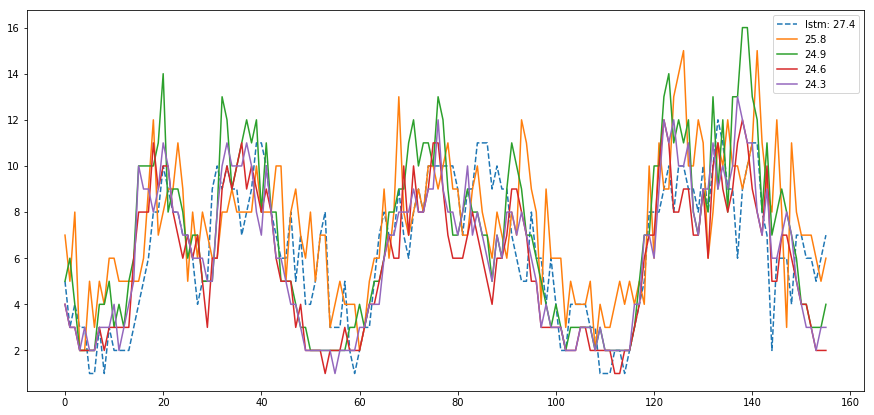

In [9]:
plt.figure(figsize=[15,7])
plt.plot(iqlstm, linestyle='--',label='lstm: 27.4')
plt.plot(iq4, label='25.8')
plt.plot(iq3, label='24.9')
plt.plot(iq2, label='24.6')
plt.plot(iq1, label='24.3')
plt.legend()
plt.show()

- #4: The Benchmark: a Negative Binomial Regression Model trained on both cities at once and just a few features.
- #3: Random Forest Regressor with features lagged at 1/2/3 weeks
- #2: Random Forest Regressor with features lagged at 1/2/3 weeks and degraded features to match test data
- #1: Random Forest Regressor with features lagged at 1/2/3 weeks, fixed seasons, and degraded features to match test data

## LSTM reviews

In [10]:
def highPassFilter(a, s, mixed=None):
    from scipy.integrate import cumtrapz
    #Get derivative of the array a
    deriv = np.gradient(a)
    #scale the derivative by a scalar
    new_deriv = deriv * s
    #Get the integral of the new, scale derivative 
    integral = cumtrapz(new_deriv, initial=0)
    length = range(len(a))
    if mixed == 'max':
        out = [max(integral[i]+a[0], a[i]) for i in length]
    elif mixed == 'min':
        out = [min(integral[i]+a[0], a[i]) for i in length]
    else:
        out = integral +a[0]
    return out
  

In [11]:
sjlstm64n50e = [17, 9, 14, 8, 9, 10, 12, 18, 25, 34, 22, 47, 58, 31, 74, 212, 243, 98, 27, 27, 6, 19, 47, 39, 24, 18, 40, 143, 229, 22, 25, 47, 42, 26, 14, 27, 28, 17, 21, 24, 34, 19, 26, 17, 22, 17, 15, 15, 9, 6, 6, 9, 6, 2, 5, 11, 12, 12, 16, 13, 19, 30, 48, 25, 30, 50, 51, 39, 21, 40, 150, 45, 24, 44, 38, 33, 35, 35, 88, 52, 33, 21, 32, 28, 20, 23, 30, 51, 30, 16, 30, 15, 17, 13, 21, 22, 34, 33, 24, 17, 9, 7, 6, 7, 14, 25, 7, 16, 40, 17, 33, 9, 34, 31, 34, 70, 21, 31, 18, 52, 16, 30, 69, 86, 65, 35, 82, 29, 29, 18, 45, 25, 22, 40, 52, 41, 29, 33, 24, 38, 24, 18, 14, 17, 12, 12, 12, 19, 16, 11, 9, 13, 10, 5, 8, 6, 27, 96, 63, 40, 51, 79, 13, 21, 54, 25, 16, 40, 27, 32, 17, 15, 47, 38, 82, 19, 46, 60, 27, 22, 18, 9, 14, 33, 32, 21, 15, 15, 42, 46, 29, 36, 11, 15, 11, 14, 12, 11, 14, 18, 12, 23, 14, 22, 24, 47, 38, 31, 12, 10, 12, 10, 11, 7, 9, 8, 9, 6, 19, 28, 40, 83, 11, 34, 11, 22, 26, 21, 32, 9, 22, 36, 9, 25, 20, 57, 21, 30, 26, 24, 55, 28, 27, 21, 17, 13, 12, 10, 17, 15, 12, 11, 10, 16, 0, 12, 17, 13, 26, 3]
sjlstm128n35e = [11, 10, 10, 8, 11, 6, 12, 13, 17, 16, 19, 31, 55, 59, 67, 40, 89, 29, 38, 15, 38, 18, 68, 27, 30, 18, 27, 99, 71, 68, 20, 23, 25, 13, 21, 20, 14, 20, 15, 19, 15, 21, 16, 14, 8, 14, 8, 12, 8, 7, 7, 5, 0, 6, 7, 2, 2, 9, 13, 13, 16, 16, 34, 25, 19, 24, 17, 29, 35, 40, 68, 30, 17, 20, 19, 26, 26, 36, 39, 25, 31, 25, 21, 20, 18, 16, 22, 28, 21, 15, 15, 13, 11, 13, 10, 39, 20, 25, 20, 11, 9, 12, 13, 15, 11, 14, 18, 3, 33, 4, 0, 10, 30, 29, 45, 32, 12, 46, 29, 26, 10, 18, 29, 24, 46, 20, 29, 26, 34, 40, 13, 27, 38, 43, 26, 24, 19, 16, 22, 15, 19, 12, 10, 10, 10, 11, 7, 7, 15, 14, 10, 7, 6, 6, 7, 10, 25, 31, 67, 63, 53, 19, 0, 40, 42, 23, 16, 23, 13, 28, 19, 18, 24, 23, 12, 25, 29, 18, 25, 17, 15, 17, 14, 32, 34, 31, 16, 23, 31, 23, 19, 21, 14, 11, 9, 12, 11, 14, 9, 8, 10, 22, 6, 16, 20, 16, 16, 11, 8, 5, 6, 7, 6, 6, 7, 6, 7, 12, 14, 18, 32, 65, 45, 22, 12, 19, 23, 17, 16, 14, 10, 16, 35, 28, 35, 25, 38, 24, 15, 27, 25, 22, 18, 12, 14, 14, 12, 11, 10, 12, 14, 15, 8, 10, 7, 0, 7, 10, 9, 5]
sjlstm32n50e = [11, 13, 10, 9, 4, 8, 17, 9, 17, 23, 26, 24, 39, 50, 93, 100, 30, 22, 69, 50, 27, 20, 29, 70, 38, 33, 30, 32, 23, 24, 28, 20, 20, 24, 25, 15, 23, 17, 12, 18, 22, 17, 14, 12, 12, 12, 14, 11, 11, 7, 7, 7, 11, 8, 9, 3, 6, 17, 17, 13, 12, 15, 32, 29, 23, 26, 15, 15, 24, 37, 70, 24, 26, 30, 26, 23, 25, 33, 38, 27, 27, 28, 30, 32, 29, 26, 26, 23, 29, 19, 19, 23, 16, 23, 14, 18, 20, 19, 21, 15, 15, 15, 5, 6, 8, 5, 31, 18, 32, 6, 18, 3, 13, 17, 9, 26, 32, 18, 43, 10, 30, 60, 74, 21, 22, 18, 23, 21, 62, 61, 22, 44, 32, 32, 31, 26, 18, 20, 26, 26, 24, 22, 14, 12, 14, 10, 17, 19, 15, 12, 7, 13, 7, 7, 8, 7, 32, 5, 48, 19, 66, 35, 45, 26, 31, 15, 16, 33, 22, 21, 19, 6, 17, 12, 14, 20, 23, 23, 26, 29, 24, 19, 22, 31, 18, 22, 58, 27, 20, 21, 29, 32, 15, 15, 17, 19, 14, 17, 21, 16, 22, 18, 21, 30, 8, 8, 33, 8, 7, 6, 16, 15, 9, 9, 8, 10, 11, 10, 21, 27, 41, 28, 23, 39, 21, 18, 23, 30, 28, 16, 25, 23, 16, 25, 51, 37, 21, 25, 30, 28, 29, 28, 30, 25, 23, 14, 15, 19, 20, 15, 13, 9, 10, 18, 8, 5, 3, 8, 7, 6]
sjlstm16n50e = [9, 10, 9, 9, 8, 6, 10, 13, 15, 16, 26, 28, 30, 29, 28, 36, 35, 36, 42, 30, 29, 34, 39, 39, 35, 37, 40, 35, 39, 38, 36, 36, 29, 25, 29, 28, 22, 16, 15, 21, 24, 20, 21, 18, 19, 12, 14, 9, 7, 5, 4, 6, 4, 3, 6, 9, 14, 13, 11, 11, 17, 20, 32, 27, 25, 32, 33, 31, 29, 32, 33, 31, 28, 35, 30, 29, 31, 38, 46, 38, 33, 34, 38, 36, 35, 34, 36, 39, 25, 21, 15, 20, 21, 16, 24, 23, 26, 26, 20, 14, 11, 8, 12, 10, 16, 14, 17, 20, 37, 7, 11, 14, 16, 28, 33, 30, 29, 36, 33, 33, 27, 30, 36, 39, 39, 33, 32, 31, 33, 38, 38, 44, 40, 43, 39, 31, 32, 31, 29, 28, 25, 20, 17, 15, 15, 15, 16, 14, 15, 15, 11, 9, 7, 5, 6, 1, 4, 16, 22, 42, 21, 12, 36, 21, 14, 14, 17, 27, 25, 23, 23, 29, 27, 21, 28, 30, 21, 26, 27, 24, 26, 27, 31, 39, 40, 33, 28, 33, 31, 26, 31, 35, 27, 25, 17, 16, 16, 13, 15, 14, 15, 15, 13, 17, 12, 14, 19, 17, 6, 7, 7, 7, 7, 5, 8, 7, 9, 13, 16, 26, 31, 31, 28, 29, 26, 23, 16, 25, 30, 25, 28, 27, 28, 22, 34, 43, 37, 30, 36, 40, 36, 36, 34, 30, 26, 19, 17, 17, 16, 18, 16, 19, 19, 9, 16, 13, 15, 9, 11, 6]
sjlstm32n32n10e = [17, 16, 10, 10, 12, 12, 13, 13, 16, 19, 22, 21, 24, 19, 20, 22, 23, 27, 27, 23, 18, 42, 47, 49, 25, 27, 25, 21, 27, 27, 49, 27, 16, 18, 19, 23, 20, 12, 16, 21, 17, 15, 16, 24, 15, 13, 14, 10, 7, 2, 0, 10, 11, 11, 11, 15, 25, 14, 17, 12, 14, 19, 22, 21, 25, 26, 28, 26, 20, 35, 24, 23, 25, 26, 23, 28, 23, 30, 31, 17, 22, 21, 27, 19, 20, 18, 21, 21, 21, 21, 23, 16, 20, 16, 12, 18, 20, 20, 22, 15, 7, 13, 10, 14, 16, 21, 15, 13, 48, 21, 38, 37, 17, 31, 23, 42, 15, 29, 32, 25, 27, 42, 18, 40, 28, 35, 27, 30, 27, 41, 36, 53, 32, 47, 107, 29, 20, 14, 22, 18, 20, 19, 10, 10, 9, 11, 13, 9, 13, 12, 10, 10, 6, 9, 10, 12, 15, 36, 5, 26, 9, 44, 12, 26, 17, 20, 20, 26, 28, 27, 24, 27, 40, 28, 18, 21, 21, 21, 24, 21, 19, 17, 22, 33, 21, 24, 39, 50, 32, 64, 21, 13, 18, 15, 13, 12, 12, 17, 14, 10, 15, 12, 15, 27, 16, 25, 22, 16, 20, 12, 13, 16, 8, 6, 1, -1, 8, 11, 17, 21, 21, 26, 21, 22, 22, 19, 42, 33, 14, 15, 33, 21, 18, 19, 26, 19, 17, 21, 25, 22, 22, 23, 20, 20, 16, 14, 16, 14, 11, 10, 11, 9, 10, 4, 15, 11, 3, 25, 16, 11]
sjlstm256n128n100e = [9, 8, 6, 6, 6, 4, 6, 7, 10, 20, 18, 32, 22, 12, 23, 57, 74, 12, 45, 25, 53, 44, 58, 15, 23, 13, 15, 41, 10, 26, 31, 22, 20, 22, 16, 19, 14, 14, 14, 12, 13, 20, 20, 15, 16, 8, 6, 6, 5, 5, 4, 4, 7, 5, 7, 11, 5, 7, 6, 7, 10, 18, 25, 19, 20, 22, 17, 18, 24, 27, 16, 14, 22, 36, 11, 26, 33, 47, 44, 18, 13, 27, 25, 21, 11, 20, 22, 23, 14, 20, 23, 13, 9, 10, 9, 10, 9, 18, 17, 11, 6, 5, 5, 6, 8, 13, 10, 4, 10, 6, 13, 7, 6, 19, 36, 48, 39, 48, 16, 18, 28, 74, 86, 33, 29, 16, 22, 21, 19, 42, 22, 11, 34, 32, 39, 28, 15, 15, 15, 11, 10, 9, 5, 7, 6, 6, 5, 9, 13, 9, 7, 4, 4, 5, 4, 3, 18, 43, 43, 22, 48, 18, 11, 34, 36, 45, 18, 17, 13, 27, 29, 15, 13, 30, 18, 28, 27, 14, 11, 17, 11, 16, 25, 24, 26, 24, 16, 11, 11, 31, 13, 16, 5, 10, 9, 7, 12, 7, 6, 10, 9, 10, 8, 9, 8, 5, 9, 6, 6, 6, 5, 7, 6, 6, 5, 4, 4, 8, 11, 19, 28, 25, 17, 16, 11, 13, 21, 21, 12, 15, 26, 13, 15, 26, 32, 30, 14, 23, 13, 22, 28, 23, 13, 19, 12, 5, 8, 8, 6, 11, 7, 9, 7, 9, 5, 7, 7, 7, 4, 5]


In [12]:
#these are with the reduced 8 feature set
sjlstm32n50e = [5, 5, 16, 8, 11, 9, 11, 6, 8, 10, 8, 10, 16, 30, 28, 33, 27, 23, 32, 32, 31, 50, 54, 45, 33, 26, 33, 24, 30, 27, 23, 20, 29, 32, 41, 31, 16, 13, 17, 23, 29, 17, 21, 14, 11, 13, 5, 9, 8, 4, 3, 7, 8, 9, 9, 6, 7, 3, 15, 9, 9, 10, 8, 11, 19, 24, 37, 41, 34, 23, 31, 28, 33, 35, 45, 41, 42, 29, 37, 38, 31, 35, 36, 35, 29, 37, 40, 31, 25, 29, 16, 18, 12, 12, 11, 17, 22, 17, 10, 11, 8, 10, 11, 9, 1, 12, 16, 9, 10, 13, 22, 19, 13, 18, 18, 11, 9, 30, 56, 33, 28, 28, 55, 31, 40, 27, 28, 27, 28, 30, 31, 26, 24, 59, 49, 37, 27, 34, 27, 32, 26, 20, 13, 9, 8, 14, 10, 15, 12, 15, 7, 6, 10, 6, 5, 8, 7, 10, 4, 35, 30, 35, 19, 46, 31, 27, 11, 12, 17, 18, 31, 31, 32, 24, 23, 27, 30, 46, 40, 32, 31, 38, 40, 39, 36, 30, 28, 27, 31, 24, 22, 25, 23, 17, 16, 17, 20, 13, 10, 18, 16, 15, 11, 10, 10, 13, 17, 13, 8, 19, 13, 14, 14, 10, 6, 8, 11, 12, 11, 11, 12, 21, 33, 29, 34, 30, 26, 27, 26, 40, 41, 41, 36, 30, 35, 29, 35, 29, 31, 31, 45, 35, 37, 30, 25, 15, 21, 14, 14, 22, 12, 9, 13, 11, 7, 5, 7, 13, 5, 9]
sjlstm64n75e = [8, 11, 12, 12, 9, 11, 13, 11, 20, 7, 12, 8, 21, 19, 45, 11, 41, 53, 33, 23, 46, 66, 75, 44, 32, 13, 35, 31, 28, 42, 17, 61, 35, 24, 19, 29, 19, 15, 17, 12, 30, 25, 20, 25, 19, 16, 9, 1, 13, 12, 9, 9, 6, 6, 11, 11, 6, 22, 18, 13, 14, 10, 16, 10, 18, 18, 28, 42, 39, 28, 78, 70, 16, 15, 49, 57, 18, 24, 24, 60, 50, 9, 21, 26, 50, 25, 16, 36, 25, 33, 18, 15, 16, 13, 14, 13, 21, 19, 12, 29, 11, 9, 7, 21, 9, 21, 17, 14, 7, 24, -14, 16, 8, 11, 14, 11, 4, 13, 16, 27, 28, 40, 34, 57, 30, 27, 33, 29, 27, 24, 17, 42, 28, 59, 47, 21, 24, 30, 28, 16, 34, 23, 24, 13, 12, 13, 13, 13, 19, 18, 9, 6, 9, 6, 9, 7, 6, 12, 13, 21, 40, 16, 31, 11, 1, 26, 12, 13, 15, 22, 22, 19, 31, 29, 55, 4, 32, 18, 42, 22, 28, 62, 56, 40, 34, 25, 32, 12, 31, 27, 31, 21, 22, 30, 15, 21, 18, 16, 11, 17, 23, 21, 10, 9, 9, 12, 9, 18, 6, 10, 12, 11, 10, 7, 8, 9, 8, 8, 12, 9, 11, 18, 24, 35, 27, 26, 35, 11, 26, 57, 70, 72, 76, 44, 14, 16, 66, 39, 9, 16, 34, 43, 25, 38, 23, 29, 13, 12, 15, 20, 19, 13, 13, 13, 9, 7, 14, 4, 7, 3]
sjlstm16n100e = [7, 5, 8, 10, 10, 5, 6, 9, 6, 5, 5, 7, 18, 31, 28, 24, 28, 28, 30, 33, 27, 26, 32, 43, 26, 20, 28, 24, 18, 25, 23, 28, 23, 21, 21, 21, 15, 15, 12, 15, 17, 19, 16, 17, 16, 7, 4, 3, 4, 6, 8, 8, 7, 4, 2, 3, 2, 11, 5, 7, 8, 10, 8, 6, 15, 24, 26, 32, 27, 29, 32, 29, 23, 38, 34, 33, 29, 23, 36, 38, 28, 20, 30, 26, 28, 29, 27, 25, 25, 21, 14, 12, 18, 16, 13, 13, 19, 21, 10, 9, 9, 9, 5, 5, 7, 10, 6, 5, 6, 10, 13, 11, 7, 11, 10, 8, 7, 21, 19, 27, 29, 28, 30, 32, 34, 26, 28, 24, 26, 23, 36, 29, 29, 27, 30, 26, 27, 19, 21, 17, 19, 16, 15, 14, 13, 11, 13, 10, 14, 10, 7, 5, 5, 6, 8, 5, 7, 4, 6, 14, 3, 19, 16, 11, 22, 11, 5, 6, 7, 15, 22, 18, 28, 28, 31, 35, 34, 23, 28, 28, 26, 30, 30, 26, 23, 31, 23, 16, 22, 20, 18, 28, 16, 15, 15, 14, 13, 13, 15, 15, 14, 15, 5, 7, 6, 9, 7, 8, 6, 6, 3, 6, 7, 8, 10, 11, 11, 10, 8, 5, 8, 16, 30, 26, 22, 36, 26, 31, 34, 29, 30, 31, 35, 28, 22, 30, 32, 28, 23, 28, 26, 28, 31, 20, 18, 17, 14, 15, 15, 18, 14, 11, 14, 6, 7, 9, 8, 5, 9, 4]
#potential explodable:
sjlstm16n200e = [11, 8, 10, 12, 13, 11, 10, 12, 13, 10, 9, 9, 21, 41, 36, 42, 34, 38, 39, 43, 48, 37, 52, 60, 35, 28, 38, 29, 25, 33, 32, 42, 31, 30, 29, 32, 20, 18, 17, 21, 28, 27, 24, 23, 18, 11, 6, 7, 7, 8, 9, 10, 7, 6, 6, 7, 4, 14, 11, 10, 10, 13, 12, 13, 21, 32, 36, 43, 36, 39, 54, 37, 41, 51, 50, 43, 39, 36, 48, 50, 37, 28, 42, 33, 39, 38, 37, 35, 37, 34, 19, 15, 33, 18, 17, 20, 28, 30, 19, 11, 11, 12, 8, 9, 11, 14, 10, 8, 9, 18, 15, 16, 12, 15, 16, 11, 14, 23, 44, 35, 40, 37, 41, 43, 43, 33, 43, 32, 35, 37, 49, 36, 39, 55, 49, 36, 38, 23, 28, 32, 24, 15, 18, 17, 17, 13, 15, 16, 17, 15, 6, 4, 5, 9, 10, 5, 8, 6, 8, 10, 9, 25, 19, 15, 18, 15, 9, 8, 10, 20, 30, 25, 39, 34, 48, 52, 44, 45, 37, 37, 31, 41, 42, 35, 29, 40, 31, 23, 29, 24, 30, 34, 15, 23, 17, 26, 14, 16, 18, 23, 16, 20, 4, 9, 7, 13, 5, 11, 9, 18, 4, 7, 5, 10, 12, 13, 13, 12, 13, 12, 10, 20, 40, 33, 34, 48, 32, 46, 49, 37, 38, 41, 45, 38, 44, 37, 46, 37, 45, 37, 35, 39, 43, 33, 24, 26, 15, 16, 22, 23, 16, 15, 17, 9, 8, 10, 11, 7, 17, 5]
sjlstm32n16n50e = [10, 7, 8, 4, 7, 5, 11, 9, 10, 10, 10, 16, 15, 33, 30, 23, 34, 22, 51, 39, 52, 49, 40, 55, 34, 14, 38, 39, 29, 40, 12, 38, 16, 36, 4, 48, 18, 9, 16, 3, 25, 27, 10, 18, 15, 15, 13, 7, 7, 1, 5, 5, 4, 4, 6, 6, 0, 1, 12, 13, 4, 11, 7, 7, 11, 39, 30, 77, 47, 35, 36, 35, 41, 30, 57, 88, 24, 6, 33, 32, 34, 0, 26, 44, 22, 35, 39, 22, 34, 25, 18, 30, 16, 14, 12, 21, 24, 49, 30, 16, 8, 6, 5, 8, 20, 13, 9, 22, 22, 9, 23, 1, 21, 12, 7, 13, 32, 10, 19, 33, 31, 26, 61, 20, 33, 38, 64, 29, 23, 2, 22, 28, 15, 61, 42, 56, 53, 26, 29, 10, 26, 17, 14, 9, 14, 13, 11, 17, 19, 13, 7, 6, 6, 4, 3, 6, 5, 11, 10, 0, -8, 39, 9, -8, 12, 7, 11, 14, 9, 10, 27, 13, 24, 32, 18, 27, 32, 5, 67, 30, 31, 35, 50, 43, 39, 30, 66, 34, 37, 29, 28, 17, 24, 15, 19, 13, 22, 10, 7, 21, 19, 13, 7, 11, 6, 14, 9, 32, 22, 4, 5, 10, 2, 10, 4, 7, 7, 7, 6, 7, 15, 17, 31, 31, 20, 32, 28, 32, 27, 41, 43, 43, 40, 47, 6, 21, 27, 35, 22, 25, 19, 63, 41, 31, 28, 13, 16, 8, 14, 23, 10, 11, 10, 9, 10, 3, 8, 24, 0, 4]
sjlstm8n200e = [7, 5, 8, 7, 8, 9, 9, 9, 8, 10, 6, 8, 18, 24, 29, 24, 38, 30, 47, 39, 46, 40, 50, 46, 44, 34, 35, 31, 31, 39, 22, 36, 29, 33, 29, 28, 21, 17, 22, 19, 21, 24, 18, 18, 14, 9, 8, 6, 7, 8, 7, 8, 9, 6, 10, 0, 9, 11, 7, 8, 9, 10, 11, 9, 28, 27, 38, 36, 43, 33, 43, 37, 26, 41, 35, 44, 36, 46, 38, 32, 31, 25, 34, 30, 32, 31, 30, 30, 29, 27, 25, 16, 18, 13, 13, 23, 19, 23, 17, 14, 7, 8, 7, 11, 19, 26, 13, 7, 8, 6, 18, 7, 0, 17, 13, 14, 16, 14, 25, 36, 41, 46, 63, 46, 58, 39, 37, 36, 33, 43, 34, 30, 38, 45, 36, 32, 28, 27, 33, 26, 27, 17, 16, 15, 13, 14, 14, 23, 17, 14, 10, 7, 9, 9, 8, 7, 8, 2, 6, 3, 54, 54, 18, 12, 18, 10, 5, 10, 13, 22, 30, 36, 34, 22, 40, 34, 37, 31, 42, 32, 32, 29, 28, 30, 30, 37, 27, 32, 31, 23, 27, 28, 20, 21, 17, 21, 19, 18, 14, 22, 15, 17, 9, 9, 5, 19, 8, 9, 8, 9, 2, 7, 8, 8, 8, 8, 8, 9, 11, 7, 9, 23, 27, 36, 28, 33, 30, 29, 31, 27, 27, 28, 34, 35, 27, 35, 30, 29, 27, 36, 35, 32, 31, 32, 24, 19, 18, 18, 22, 19, 12, 11, 12, 11, 8, 8, 15, 10, 9, 7]
sjlstm8n4n50e = [15, 14, 12, 10, 7, 8, 10, 11, 9, 9, 10, 9, 11, 12, 18, 19, 24, 23, 28, 26, 28, 31, 32, 32, 23, 22, 22, 20, 21, 25, 22, 23, 18, 15, 18, 18, 15, 12, 13, 16, 18, 17, 17, 19, 16, 13, 13, 13, 10, 11, 8, 7, 7, 9, 11, 15, 18, 17, 10, 10, 11, 8, 9, 9, 12, 16, 21, 20, 21, 23, 24, 22, 20, 23, 18, 20, 21, 22, 22, 18, 18, 19, 21, 17, 15, 15, 16, 16, 15, 16, 18, 19, 19, 12, 12, 13, 15, 20, 19, 18, 11, 7, 8, 11, 14, 18, 14, 13, 13, 23, 26, 27, 12, 17, 21, 15, 18, 23, 28, 23, 22, 25, 27, 28, 30, 25, 25, 22, 23, 22, 20, 19, 26, 33, 31, 20, 17, 16, 16, 18, 19, 15, 15, 12, 11, 10, 11, 12, 13, 14, 10, 10, 8, 10, 9, 8, 7, 9, 10, 16, 24, 30, 19, 24, 30, 30, 11, 12, 13, 13, 17, 23, 22, 22, 24, 26, 17, 19, 21, 18, 17, 14, 14, 15, 15, 16, 20, 24, 24, 21, 21, 24, 14, 13, 12, 12, 12, 13, 12, 13, 13, 15, 12, 11, 12, 16, 20, 15, 13, 15, 9, 11, 10, 8, 8, 7, 7, 7, 8, 9, 10, 12, 13, 21, 22, 23, 19, 20, 22, 14, 14, 14, 15, 17, 20, 21, 16, 17, 20, 23, 18, 19, 18, 17, 15, 13, 12, 13, 13, 13, 13, 12, 11, 11, 11, 9, 11, 14, 16, 8]
sjlstm8n4n500e = [11, 10, 9, 8, 8, 9, 9, 10, 8, 9, 8, 7, 11, 29, 32, 31, 36, 33, 41, 35, 48, 46, 34, 37, 40, 32, 35, 29, 28, 32, 26, 30, 27, 26, 24, 26, 19, 14, 15, 16, 17, 17, 17, 19, 18, 15, 11, 9, 6, 7, 5, 7, 7, 7, 7, 7, 9, 11, 8, 8, 9, 8, 10, 9, 13, 19, 33, 34, 35, 36, 42, 61, 52, 36, 62, 66, 34, 38, 39, 44, 60, 30, 30, 30, 26, 24, 25, 27, 28, 23, 18, 17, 17, 15, 17, 18, 19, 23, 19, 15, 9, 8, 8, 9, 8, 12, 9, 9, 8, 13, 15, 15, 8, 10, 13, 10, 10, 15, 22, 27, 29, 41, 34, 38, 43, 38, 34, 33, 28, 31, 35, 38, 37, 41, 33, 27, 27, 26, 28, 25, 25, 16, 15, 14, 14, 14, 14, 14, 14, 15, 12, 9, 6, 7, 7, 6, 5, 5, 6, 13, 23, 30, 19, 12, 17, 17, 7, 7, 8, 11, 18, 28, 26, 27, 29, 38, 29, 32, 38, 26, 28, 37, 36, 30, 25, 24, 28, 27, 26, 22, 21, 28, 23, 20, 14, 14, 14, 13, 13, 14, 15, 15, 13, 10, 7, 9, 13, 10, 10, 12, 7, 7, 6, 6, 7, 7, 8, 9, 9, 9, 9, 11, 25, 30, 32, 37, 32, 30, 37, 45, 62, 59, 54, 38, 32, 38, 45, 53, 33, 38, 25, 28, 29, 31, 21, 15, 15, 15, 15, 15, 16, 18, 19, 16, 13, 8, 8, 10, 12, 6]
sjlstm16n8n50e = [15, 13, 9, 5, 6, 10, 10, 9, 8, 9, 8, 7, 10, 21, 32, 29, 36, 32, 36, 38, 38, 39, 37, 36, 36, 33, 32, 33, 29, 34, 31, 38, 25, 26, 28, 28, 20, 14, 16, 22, 27, 21, 24, 27, 20, 15, 14, 10, 6, 5, 3, 4, 6, 7, 9, 10, 10, 8, 8, 9, 8, 7, 8, 9, 13, 24, 34, 34, 35, 35, 32, 37, 31, 34, 33, 36, 34, 35, 34, 31, 34, 30, 32, 38, 26, 27, 27, 27, 27, 28, 23, 22, 18, 16, 15, 18, 24, 32, 26, 21, 7, 6, 7, 10, 13, 21, 12, 10, 10, 8, 18, 14, 8, 12, 17, 15, 9, 23, 30, 34, 34, 36, 37, 37, 37, 35, 34, 34, 34, 33, 37, 32, 33, 37, 33, 31, 32, 25, 26, 26, 27, 22, 16, 14, 12, 12, 13, 14, 17, 14, 10, 9, 5, 5, 4, 6, 4, 8, 7, 5, 16, 6, 8, 7, 21, 16, 9, 10, 9, 10, 22, 34, 30, 32, 30, 33, 32, 32, 35, 29, 32, 27, 28, 27, 27, 27, 31, 33, 36, 25, 24, 26, 22, 19, 15, 14, 15, 13, 13, 13, 19, 16, 13, 9, 8, 12, 16, 11, 9, 12, 9, 6, 5, 3, 4, 5, 6, 7, 9, 10, 9, 10, 22, 34, 33, 34, 33, 30, 33, 26, 28, 28, 30, 32, 31, 41, 30, 33, 30, 34, 29, 31, 28, 29, 22, 16, 15, 15, 16, 18, 16, 15, 17, 15, 11, 5, 9, 9, 10, 7]



In [44]:
gru16e100 = [11, 10, 9, 7, 7, 9, 9, 9, 8, 8, 9, 8, 13, 18, 29, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 28, 27, 29, 26, 26, 25, 21, 21, 20, 15, 14, 16, 17, 17, 18, 19, 17, 15, 15, 13, 11, 9, 8, 5, 7, 8, 8, 9, 11, 11, 11, 9, 9, 9, 7, 8, 8, 14, 21, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 29, 28, 21, 19, 20, 20, 22, 19, 18, 17, 17, 18, 12, 12, 18, 18, 20, 16, 12, 7, 8, 8, 11, 11, 11, 10, 11, 10, 13, 12, 12, 11, 12, 12, 11, 12, 16, 19, 29, 30, 31, 31, 31, 31, 31, 31, 30, 30, 30, 31, 31, 31, 31, 31, 28, 27, 25, 21, 19, 19, 16, 15, 11, 11, 12, 11, 15, 13, 13, 10, 11, 8, 8, 6, 8, 6, 9, 9, 17, 21, 15, 13, 13, 12, 12, 9, 9, 9, 15, 19, 23, 24, 27, 28, 30, 27, 30, 30, 22, 22, 21, 22, 20, 19, 21, 24, 22, 19, 20, 20, 23, 14, 16, 12, 15, 14, 13, 11, 15, 13, 15, 12, 8, 11, 11, 11, 11, 9, 11, 8, 7, 9, 7, 6, 6, 6, 7, 8, 8, 8, 14, 18, 29, 30, 30, 29, 27, 29, 24, 27, 28, 28, 29, 30, 30, 27, 30, 29, 29, 21, 25, 25, 21, 14, 15, 14, 14, 15, 15, 12, 11, 13, 13, 9, 6, 11, 9, 9, 8]
gru32e30 = [11, 11, 8, 6, 7, 10, 9, 8, 9, 8, 10, 8, 12, 19, 30, 31, 32, 32, 33, 33, 32, 33, 32, 33, 32, 31, 32, 32, 31, 32, 31, 29, 27, 26, 28, 26, 19, 15, 17, 18, 19, 19, 19, 17, 14, 13, 10, 10, 8, 7, 6, 7, 8, 8, 10, 11, 10, 8, 10, 8, 8, 7, 8, 8, 14, 24, 32, 32, 32, 32, 32, 31, 31, 32, 31, 32, 32, 32, 33, 32, 30, 31, 32, 28, 27, 28, 27, 27, 24, 23, 20, 17, 17, 13, 14, 17, 19, 20, 14, 10, 6, 7, 8, 10, 11, 12, 9, 11, 10, 13, 9, 11, 10, 12, 12, 12, 12, 17, 26, 32, 32, 32, 33, 33, 33, 33, 32, 32, 32, 32, 31, 31, 32, 32, 32, 31, 28, 25, 25, 27, 24, 20, 15, 13, 13, 13, 13, 18, 15, 15, 10, 11, 8, 7, 6, 8, 6, 10, 8, 17, 21, 18, 18, 14, 11, 13, 10, 11, 9, 15, 23, 31, 31, 32, 30, 30, 29, 31, 32, 29, 27, 25, 25, 25, 25, 27, 30, 31, 29, 28, 28, 28, 19, 20, 13, 17, 15, 15, 14, 18, 15, 16, 13, 9, 10, 11, 9, 11, 7, 8, 10, 7, 8, 7, 6, 6, 6, 7, 8, 10, 8, 14, 24, 32, 32, 31, 30, 28, 28, 25, 26, 26, 29, 30, 31, 30, 27, 29, 30, 32, 30, 31, 29, 24, 20, 16, 15, 15, 17, 16, 14, 13, 14, 11, 8, 6, 10, 7, 6, 9]
lstm16gru8e50 = [15, 14, 12, 10, 8, 12, 14, 14, 13, 15, 14, 12, 21, 28, 31, 30, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 31, 31, 31, 33, 31, 29, 28, 27, 28, 28, 23, 17, 19, 20, 20, 21, 20, 19, 19, 11, 11, 12, 9, 10, 7, 6, 7, 10, 10, 10, 12, 13, 10, 11, 13, 11, 13, 14, 22, 32, 31, 31, 32, 33, 32, 33, 31, 32, 31, 32, 32, 33, 32, 31, 31, 30, 31, 28, 28, 27, 28, 28, 26, 23, 21, 20, 20, 15, 14, 18, 19, 19, 15, 14, 11, 8, 10, 13, 12, 16, 15, 15, 12, 13, 11, 12, 12, 16, 18, 16, 16, 21, 32, 31, 32, 33, 33, 33, 33, 33, 33, 32, 32, 32, 30, 32, 33, 33, 33, 30, 28, 28, 28, 27, 27, 23, 19, 17, 16, 16, 16, 18, 18, 18, 9, 8, 7, 9, 8, 7, 7, 8, 9, 11, 9, 17, 17, 11, 11, 12, 13, 13, 13, 20, 31, 31, 30, 32, 31, 30, 30, 30, 31, 28, 28, 28, 28, 28, 28, 28, 31, 32, 30, 30, 27, 29, 25, 23, 17, 18, 18, 18, 16, 18, 18, 19, 12, 9, 8, 10, 13, 13, 10, 13, 9, 11, 9, 7, 8, 7, 8, 10, 13, 14, 14, 21, 29, 31, 31, 31, 31, 29, 29, 28, 29, 29, 29, 30, 31, 30, 29, 31, 31, 32, 28, 30, 29, 29, 23, 17, 17, 17, 18, 18, 16, 14, 13, 9, 8, 9, 8, 10, 12, 7]


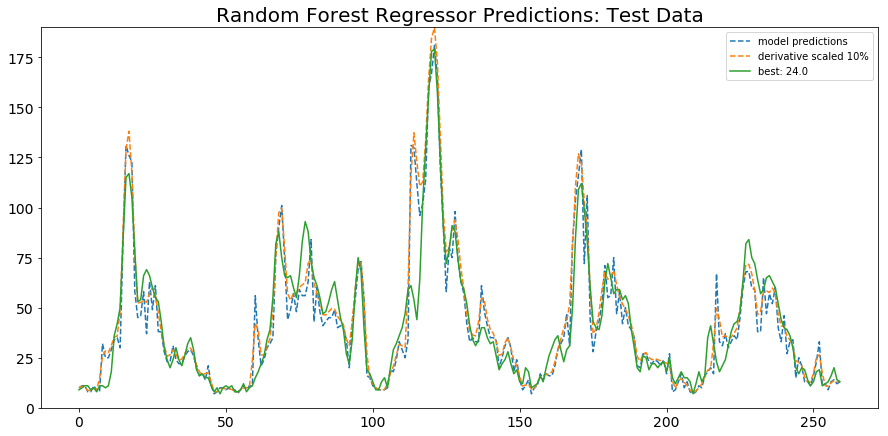

In [14]:

#for presentation
plt.figure(figsize=[15,7])
plt.plot(sj2, linestyle='--', label='model predictions')
plt.plot(highPassFilter(sj2, 1.1), linestyle='--', label='derivative scaled 10%')
#plt.plot(highPassFilter(sj3, 1.1, mixed='max'), label='max of either')
plt.plot(sj5, label='best: 24.0')
plt.title('Random Forest Regressor Predictions: Test Data', size=20)
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylim(0,190)
plt.legend()
plt.show()

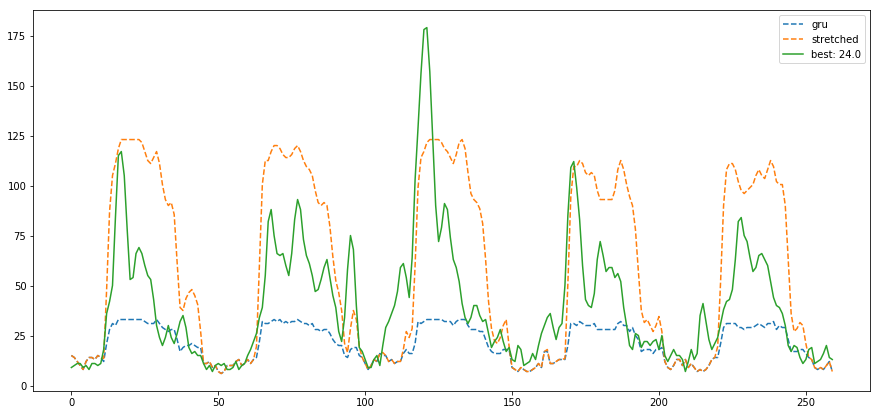

In [51]:
v = lstm16gru8e50


plt.figure(figsize=[15,7])
plt.plot(v, linestyle='--', label='gru')
#plt.plot(highPassFilter(sjlstm8n200e, 3.5, mixed='max'), linestyle='--', label='lstm*3.5: 31.0')
plt.plot(highPassFilter(v, 6, mixed='max'), linestyle='--', label='stretched')
plt.plot(sj5, label='best: 24.0')
plt.legend()
plt.show()

# Avg of RFR with an interesting LSTM option

In [69]:
rfr = sj5
lstm = highPassFilter(lstm16gru8e50, 6, mixed='max')
avg_for_sj = [int(i/2) for i in np.add(rfr, lstm)]

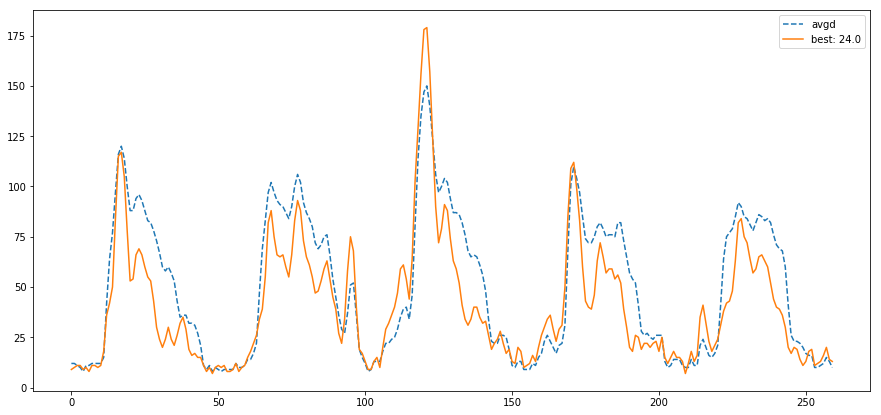

In [70]:
plt.figure(figsize=[15,7])
plt.plot(avg_for_sj, linestyle='--', label='avgd')
plt.plot(sj5, label='best: 24.0')
plt.legend()
plt.show()

In [71]:
iq_pred = iq1 = [ 4,  3,  3,  2,  3,  2,  2,  3,  3,  3,  4,  2,  3,  4,  5, 10,  9,
        9,  8,  9, 11, 10,  8,  8,  7,  7,  6,  6,  6,  5,  5,  8, 10, 11,
       10, 10, 10, 11, 10,  8,  7, 10,  8,  6,  6,  5,  4,  4,  3,  2,  2,
        2,  2,  2,  2,  1,  2,  2,  2,  2,  3,  3,  4,  4,  4,  6,  7,  7,
        8,  8,  8,  9,  8,  8,  9,  9, 12,  9,  8,  8,  7,  8, 10,  7,  8,
        7,  6,  5,  7,  6,  8,  8,  7,  8,  7,  6,  5,  3,  4,  3,  3,  3,
        2,  2,  2,  3,  3,  3,  2,  3,  2,  2,  2,  2,  2,  2,  4,  4,  7,
        7,  6,  9, 12, 11, 12, 10, 10, 11,  8,  7,  9,  9, 11,  9, 10,  9,
       10, 13, 12, 11, 11,  8,  7,  9,  6,  6,  7,  8,  7,  5,  4,  3,  3,
        2,  3,  3]

In [72]:
submission = pd.read_csv('data/submission_format.csv',
                            index_col=[0, 1, 2])

In [73]:
submission.total_cases = np.concatenate([avg_for_sj, iq_pred])
submission.to_csv("submissions/sj_avgof_rfr_lstmgru.iq_best_rfr.csv")

Doubled gradient for SJ

In [124]:
sj_pred = [int(x) for x in highPassFilter(sj1, 2, mixed='max')]

In [125]:
iq_pred = iq1 = [ 4,  3,  3,  2,  3,  2,  2,  3,  3,  3,  4,  2,  3,  4,  5, 10,  9,
        9,  8,  9, 11, 10,  8,  8,  7,  7,  6,  6,  6,  5,  5,  8, 10, 11,
       10, 10, 10, 11, 10,  8,  7, 10,  8,  6,  6,  5,  4,  4,  3,  2,  2,
        2,  2,  2,  2,  1,  2,  2,  2,  2,  3,  3,  4,  4,  4,  6,  7,  7,
        8,  8,  8,  9,  8,  8,  9,  9, 12,  9,  8,  8,  7,  8, 10,  7,  8,
        7,  6,  5,  7,  6,  8,  8,  7,  8,  7,  6,  5,  3,  4,  3,  3,  3,
        2,  2,  2,  3,  3,  3,  2,  3,  2,  2,  2,  2,  2,  2,  4,  4,  7,
        7,  6,  9, 12, 11, 12, 10, 10, 11,  8,  7,  9,  9, 11,  9, 10,  9,
       10, 13, 12, 11, 11,  8,  7,  9,  6,  6,  7,  8,  7,  5,  4,  3,  3,
        2,  3,  3]

In [126]:
submission = pd.read_csv('data/submission_format.csv',
                            index_col=[0, 1, 2])

In [127]:
submission.total_cases = np.concatenate([sj_pred, iq_pred])
submission.to_csv("submissions/sj_bestrfrgradient2.0_iq_bestrfr.csv")